<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
# Display column names
print("Column Names:")
print(df.columns)

# Display data types of each column
print("\nData Types:")
print(df.dtypes)

# Display summary information about the dataset
print("\nSummary Information:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

Column Names:
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

Data Types:
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

Sum

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [4]:
## Write your code here
# Step 1: Identify missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

# Step 2: Handling missing values

# Option 1: Impute missing numerical values with the mean
# First, separate numerical columns from non-numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing numerical values with the mean
df_imputed = df.copy()
df_imputed[numerical_cols] = df_imputed[numerical_cols].fillna(df_imputed[numerical_cols].mean())

# For categorical columns, we can impute with the mode (most frequent value)
for column in categorical_cols:
    df_imputed[column] = df_imputed[column].fillna(df_imputed[column].mode()[0])

# Option 2: Remove rows with missing values (optional)
# df_dropped = df.dropna()  # This will remove rows with any missing values

# Step 3: Confirm that missing values have been handled
print("\nMissing values after imputation or removal:")
print(df_imputed.isnull().sum())  # Check missing values after imputation
# print(df_dropped.isnull().sum())  # Check missing values after removal (if using drop)

# Optional: Display summary information after handling missing values
print("\nSummary Info after Imputation:")
print(df_imputed.info())

Missing values per column:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Missing values after imputation or removal:
ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64

Summary Info after Imputation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here
# Step 1: Calculate value counts for the key columns

# Employment status distribution
employment_counts = df['Employment'].value_counts(dropna=False)
print("Value counts for 'Employment' column:")
print(employment_counts)

# Job Satisfaction distribution
job_sat_counts = df['JobSat'].value_counts(dropna=False)
print("\nValue counts for 'JobSat' (Job Satisfaction) column:")
print(job_sat_counts)

# Professional Coding Experience (YearsCodePro) distribution
years_code_pro_counts = df['YearsCodePro'].value_counts(dropna=False)
print("\nValue counts for 'YearsCodePro' (Professional Coding Experience) column:")
print(years_code_pro_counts)

Value counts for 'Employment' column:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, b

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


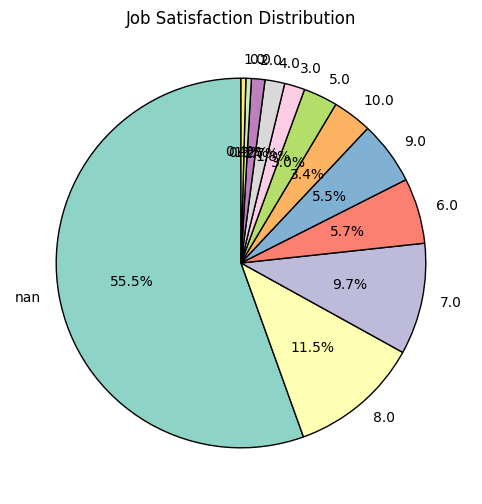

/tmp/ipykernel_615/712719516.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['JobSat_num'].dropna(), shade=True, color='skyblue', alpha=0.7)


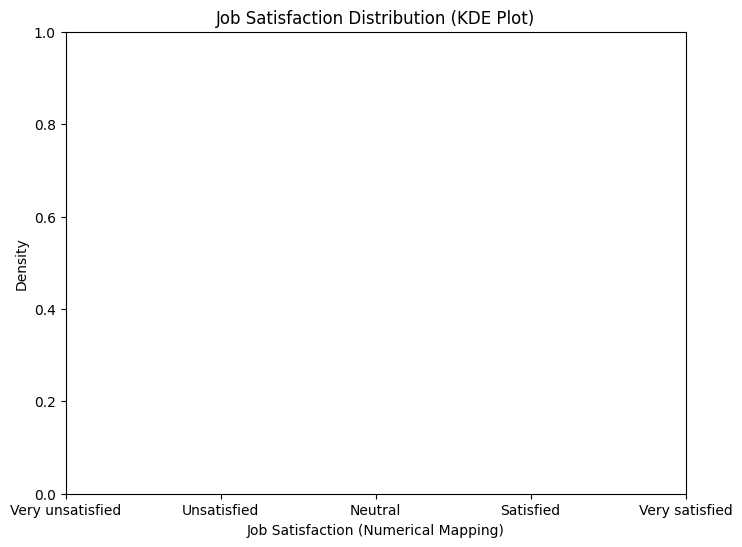

In [6]:
## Write your code here
# Step 1: Calculate value counts for 'JobSat' column
job_sat_counts = df['JobSat'].value_counts(dropna=False)

# Step 2: Plot a Pie Chart for Job Satisfaction distribution
plt.figure(figsize=(8, 6))
job_sat_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3", len(job_sat_counts)), 
                        startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Job Satisfaction Distribution')
plt.ylabel('')  # Hide the y-label to make the plot cleaner
plt.show()

# Step 3: Optional KDE plot for categorical data (mapping categories to numerical values)
# Convert job satisfaction categories into numerical values
job_sat_map = {'Very satisfied': 4, 'Satisfied': 3, 'Neutral': 2, 'Unsatisfied': 1, 'Very unsatisfied': 0}
df['JobSat_num'] = df['JobSat'].map(job_sat_map)

# Plot the KDE plot for job satisfaction
plt.figure(figsize=(8, 6))
sns.kdeplot(df['JobSat_num'].dropna(), shade=True, color='skyblue', alpha=0.7)
plt.title('Job Satisfaction Distribution (KDE Plot)')
plt.xlabel('Job Satisfaction (Numerical Mapping)')
plt.ylabel('Density')
plt.xticks([0, 1, 2, 3, 4], ['Very unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very satisfied'])
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


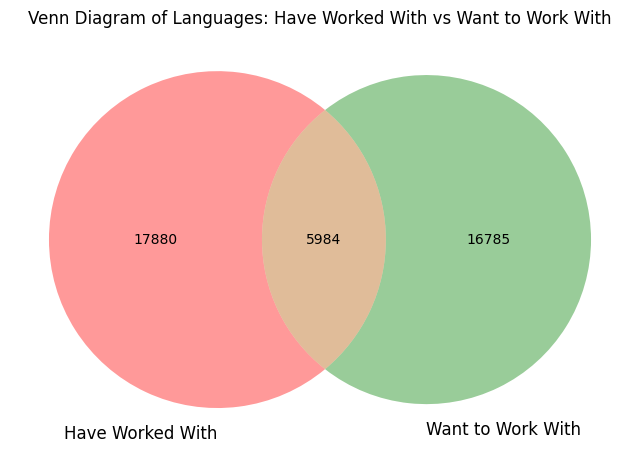

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f7de4aefa60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
## Write your code here
!pip install matplotlib-venn
from collections import Counter
from matplotlib_venn import venn2


# Step 1: Process the 'LanguageHaveWorkedWith' and 'LanguageWantToWorkWith' columns
# Split the comma-separated strings into lists
languages_worked_with = df['LanguageHaveWorkedWith'].dropna().str.split(',')
languages_want_to_work_with = df['LanguageWantToWorkWith'].dropna().str.split(',')

# Flatten the lists and count the frequency of each language
languages_worked_with_flat = [lang.strip() for sublist in languages_worked_with for lang in sublist]
languages_want_to_work_with_flat = [lang.strip() for sublist in languages_want_to_work_with for lang in sublist]

worked_with_counter = Counter(languages_worked_with_flat)
want_to_work_with_counter = Counter(languages_want_to_work_with_flat)

# Step 2: Visualize the overlap and differences

# Venn Diagram for the overlap between 'HaveWorkedWith' and 'WantToWorkWith'
# We will plot the languages that are in both categories
common_languages = set(worked_with_counter.keys()).intersection(want_to_work_with_counter.keys())
only_worked_with = set(worked_with_counter.keys()) - common_languages
only_want_to_work_with = set(want_to_work_with_counter.keys()) - common_languages

# Create a Venn diagram
plt.figure(figsize=(8, 6))
venn2(subsets=(len(only_worked_with), len(only_want_to_work_with), len(common_languages)),
      set_labels=('Have Worked With', 'Want to Work With'))
plt.title('Venn Diagram of Languages: Have Worked With vs Want to Work With')
plt.show()

# Step 3: Grouped bar chart to visualize the frequencies of languages in both categories
# Convert the counters to DataFrames for easy plotting
worked_with_df = pd.DataFrame(worked_with_counter.items(), columns=['Language', 'Worked With Count'])
want_to_work_with_df = pd.DataFrame(want_to_work_with_counter.items(), columns=['Language', 'Want to Work With Count'])

# Merge the two DataFrames on 'Language'
merged_df = pd.merge(worked_with_df, want_to_work_with_df, on='Language', how='outer').fillna(0)

# Sort by the total counts for better visualization
merged_df['Total Count'] = merged_df['Worked With Count'] + merged_df['Want to Work With Count']
merged_df = merged_df.sort_values('Total Count', ascending=False)

# Plot the grouped bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Total Count', y='Language', data=merged_df, color='skyblue', label='Total Count')
sns.barplot(x='Worked With Count', y='Language', data=merged_df, color='lightgreen', label='Worked With')
sns.barplot(x='Want to Work With Count', y='Language', data=merged_df, color='salmon', label='Want to Work With')

plt.title('Frequency of Languages: Have Worked With vs Want to Work With')
plt.xlabel('Count')
plt.ylabel('Programming Languages')
plt.legend(title="Categories")
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


/tmp/ipykernel_615/2426689032.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=region_remote_work_counts, x='Country', y='Count', hue='RemoteWork', ci=None)


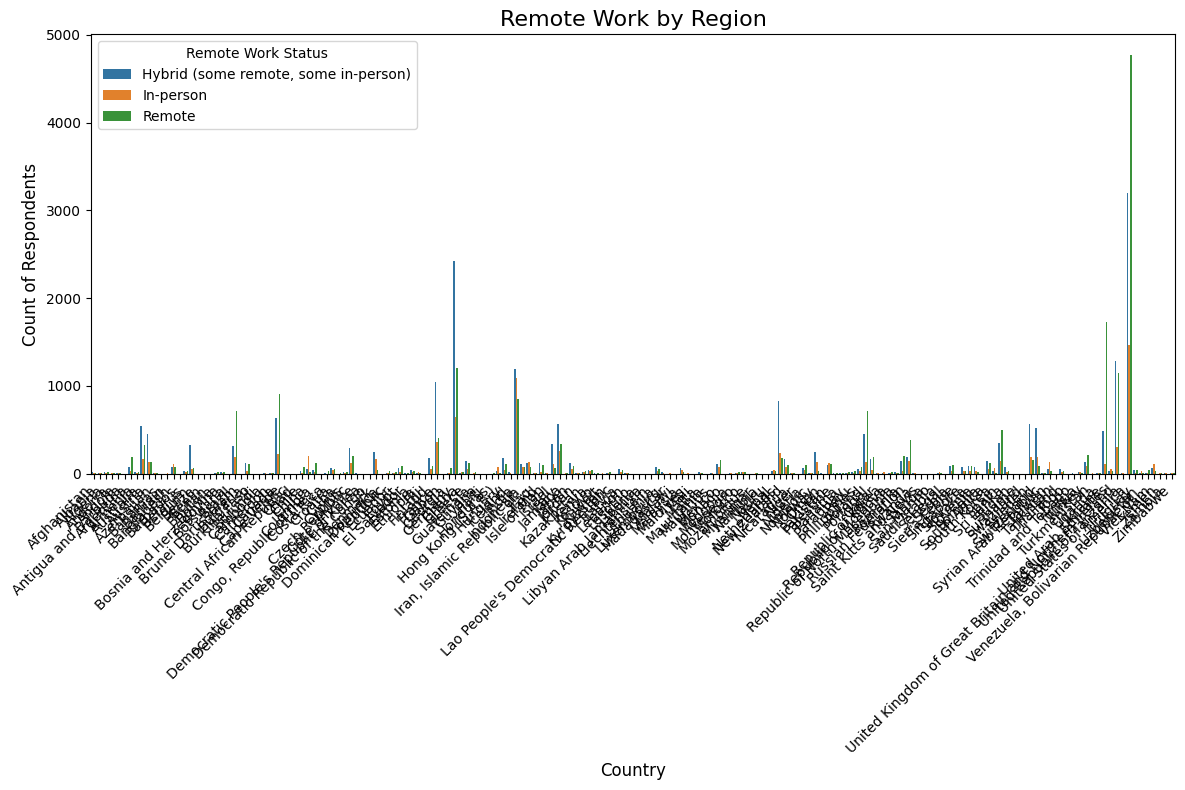

In [13]:
## Write your code here
# Group by 'Country' and 'RemoteWork' and count the occurrences
region_remote_work_counts = df.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count')

# Now you can proceed with your plot
plt.figure(figsize=(12, 8))
sns.barplot(data=region_remote_work_counts, x='Country', y='Count', hue='RemoteWork', ci=None)
plt.title('Remote Work by Region', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Status')
plt.tight_layout()
plt.show()





### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [11]:

import scipy.stats as stats  # Make sure this line is included


# Step 1: Clean the data
# We'll drop rows with missing values in 'JobSat' or 'YearsCodePro' columns
df_cleaned = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Step 2: Calculate the Pearson correlation
pearson_corr, _ = stats.pearsonr(df_cleaned['JobSat'], df_cleaned['YearsCodePro'])

# Step 3: Calculate the Spearman correlation (if you suspect a non-linear relationship)
spearman_corr, _ = stats.spearmanr(df_cleaned['JobSat'], df_cleaned['YearsCodePro'])

# Step 4: Print the results
print(f"Pearson Correlation between JobSat and YearsCodePro: {pearson_corr:.3f}")
print(f"Spearman Correlation between JobSat and YearsCodePro: {spearman_corr:.3f}")  # Fixed unterminated f-string


Pearson Correlation between JobSat and YearsCodePro: 0.103
Spearman Correlation between JobSat and YearsCodePro: 0.121


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_615/4278467189.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

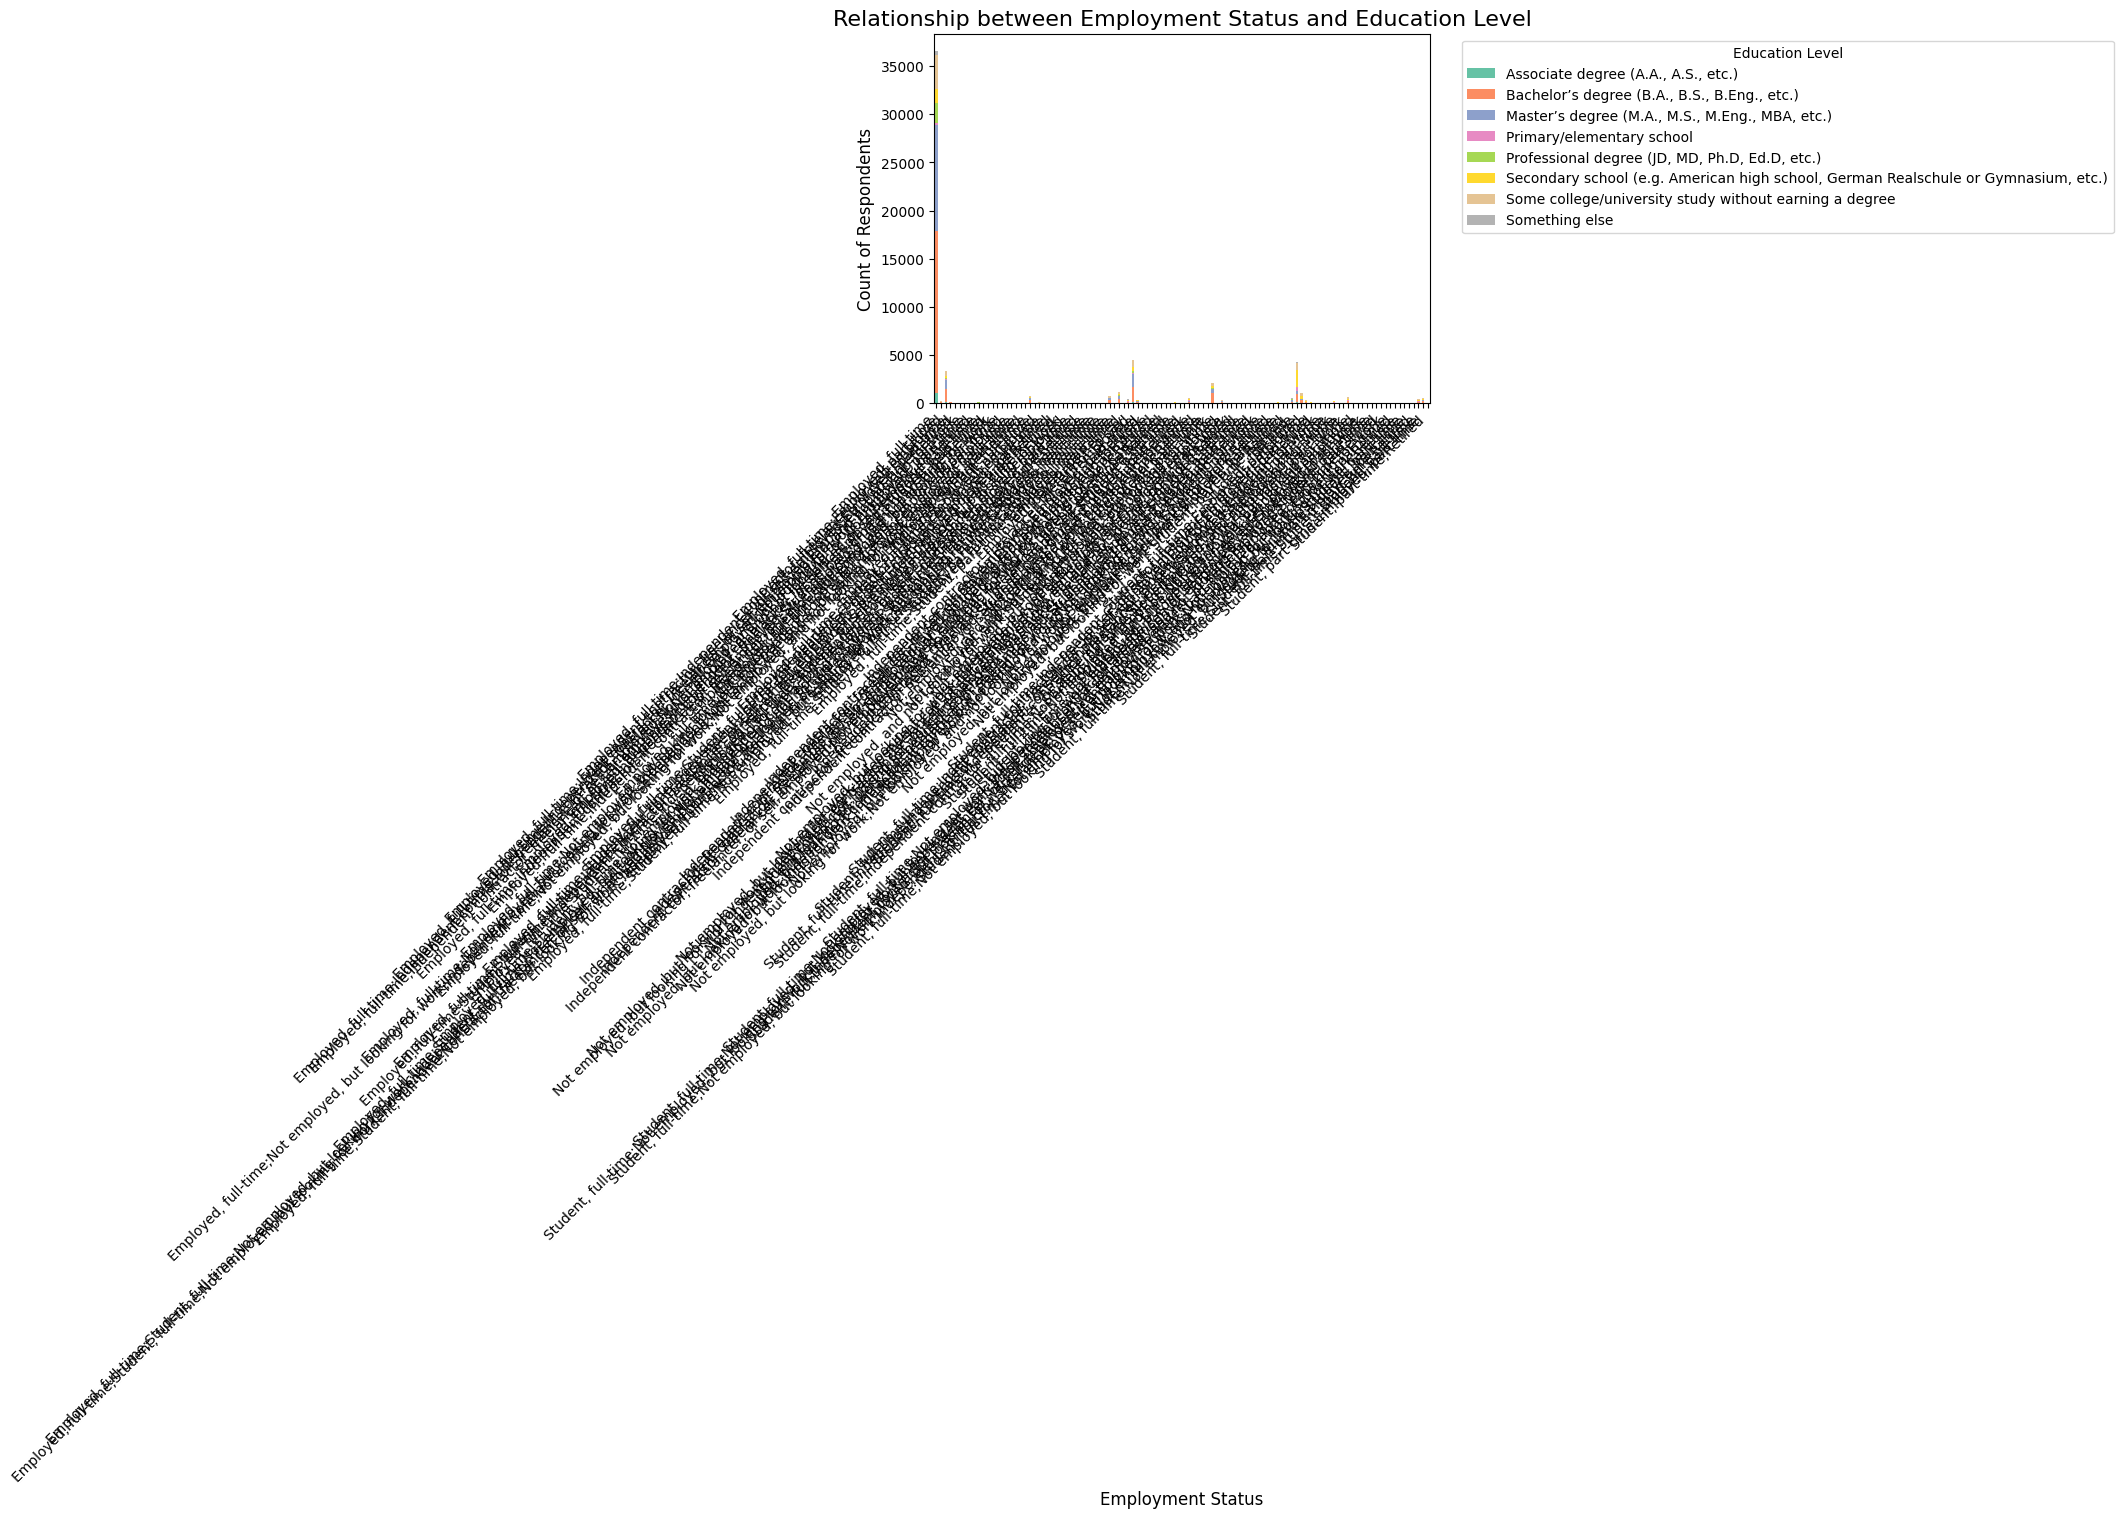

In [9]:
## Write your code here
# Step 1: Clean the data
# We'll drop rows with missing values in 'Employment' or 'EdLevel' columns
df_cleaned = df.dropna(subset=['Employment', 'EdLevel'])

# Step 2: Create the cross-tabulation
employment_education_crosstab = pd.crosstab(df_cleaned['Employment'], df_cleaned['EdLevel'])

# Step 3: Plot the stacked bar plot
plt.figure(figsize=(12, 8))
employment_education_crosstab.plot(kind='bar', stacked=True, colormap='Set2')

# Step 4: Customize the plot
plt.title('Relationship between Employment Status and Education Level', fontsize=16)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
cleaned_data_file = 'cleaned_survey_data.csv'
df_cleaned.to_csv(cleaned_data_file, index=False)

# Confirm that the file has been saved
print(f"Cleaned dataset has been saved to {cleaned_data_file}")

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
